<a href="https://colab.research.google.com/github/devopsopenshift/python/blob/main/coded_project/AUSTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description
**Age**: The age of the individual in years.

Gender: The gender of the individual, categorized as male or female.

Profession: The occupation or profession of the individual.

Marital_status: The marital status of the individual, such as married &, single

Education: The educational qualification of the individual Graduate and Post Graduate

No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.

Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"

House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"

Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"

Salary: The individual's salary or income.

Partner_salary: The salary or income of the individual's partner, if applicable.

Total_salary: The total combined salary of the individual and their partner (if applicable).

Price: The price of a product or service.
Make: The type of automobile

In [109]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Sanity check

In [149]:
data = pd.read_csv('austo_automobile.csv',na_values=['missing','inf','nan'])

**checking duplicate data**

In [150]:
data.duplicated().sum()

0

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [151]:
data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [114]:
data['Partner_salary'].fillna(0,inplace=True)

In [115]:
data['Profession'].unique()

array(['Business', 'Salaried'], dtype=object)

In [116]:
data['Marital_status'].unique()

array(['Married', 'Single'], dtype=object)

In [152]:
data['Partner_salary'].value_counts(dropna=False,normalize=True)

Partner_salary
0.000       0.394
NaN         0.067
40500.000   0.018
40200.000   0.017
40100.000   0.016
             ... 
45800.000   0.001
27300.000   0.001
22900.000   0.001
23100.000   0.001
35000.000   0.001
Name: proportion, Length: 150, dtype: float64

In [117]:
data['Gender'].value_counts(dropna=False,normalize=True)

Gender
Male     0.758
Female   0.207
NaN      0.034
Femal    0.001
Femle    0.001
Name: proportion, dtype: float64

In [118]:
data['Gender']=data['Gender'].map(lambda x : 'Female' if x in ["Femal", "Female", "Femle"] else x)

In [119]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Gender,53,3.352


In [120]:
data.shape

(1581, 14)

<Axes: xlabel='Partner_salary'>

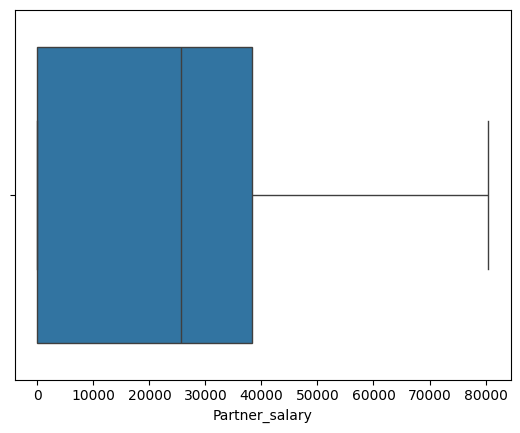

In [155]:
sns.boxplot(data,x='Partner_salary')

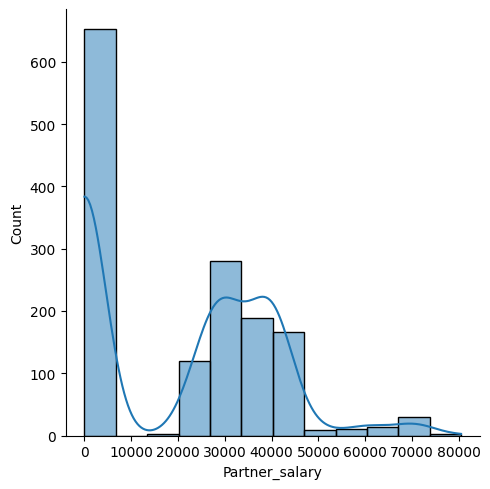

In [153]:
sns.displot(data,x=data['Partner_salary'],kde=True)

In [122]:
data[data['Gender'].isnull()==True]['Education'].value_counts(normalize=True,dropna=False)

Education
Post Graduate   0.642
Graduate        0.358
Name: proportion, dtype: float64

In [123]:
data[data['Gender'].isnull()==True]['Make'].value_counts(normalize=True,dropna=False)

Make
Sedan       0.849
SUV         0.113
Hatchback   0.038
Name: proportion, dtype: float64

## Analysis

In [124]:
data.describe(include='object').T

,count,unique,top,freq
Gender,1528,2,Male,1199
Profession,1581,2,Salaried,896
Marital_status,1581,2,Married,1443
Education,1581,2,Post Graduate,985
Personal_loan,1581,2,Yes,792
House_loan,1581,2,No,1054
Partner_working,1581,2,Yes,868
Make,1581,3,Sedan,702


In [156]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.000,31.922,8.426,22.000,25.000,29.000,38.000,54.000
No_of_Dependents,1581.000,2.458,0.943,0.000,2.000,2.000,3.000,4.000
Salary,1581.000,60392.220,14674.825,30000.000,51900.000,59500.000,71800.000,99300.000
Partner_salary,1475.000,20225.559,19573.149,0.000,0.000,25600.000,38300.000,80500.000
Total_salary,1581.000,79625.996,25545.858,30000.000,60500.000,78000.000,95900.000,171000.000
Price,1581.000,35597.723,13633.637,18000.000,25000.000,31000.000,47000.000,70000.000


In [126]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.000,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.000,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.000,139900,57000,SUV


### Univariate analysis

In [127]:
data.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

### Gender preferences

In [128]:
catgmplot=lambda x: px.histogram(data, x=x, color="Gender", barmode='group')

In [129]:
lst_num_var = [ 'Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Make']

plots=( catgmplot(n) for n in lst_num_var )
for plot in plots:
    plot.show()

### Make preferences

In [130]:
catgmplot=lambda x: px.histogram(data, x=x, color="Make", barmode='group')

In [131]:
lst_num_var = [ 'Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Gender']

plots=( catgmplot(n) for n in lst_num_var )
for plot in plots:
    plot.show()

#### Make and Price preferences

In [132]:
data['Make'].value_counts(normalize=True)

Make
Sedan       0.444
Hatchback   0.368
SUV         0.188
Name: proportion, dtype: float64

In [133]:
import plotly.express as px

In [134]:
catgplot = lambda p : px.box(data,x=p,y='Price')

In [135]:
lst_num_var = [ 'Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Marital_status','Make']

plots=( catgplot(n) for n in lst_num_var )
for plot in plots:
    plot.show()

In [136]:
catgplot = lambda p : px.box(data,x=p,y='Price',color='Make')

Observing same demand across different demographics of Profession, Education, Personal Loan,partner working.
Whereas  people owing home loan tend to buy less expensive SUVs compared to who don't owe home loan.
Overall females prefere more expensive sedan over males, Whereas males prefer more expesive SUVs over females.

Sedan is most common purchase option. 44% sale is observed.

In [137]:
lst_num_var = [ 'Gender','Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Marital_status']

plots=( catgplot(n) for n in lst_num_var )
for plot in plots:
    plot.show()

In [139]:
cntplot=lambda x: sns.countplot(data,x=x,hue='Make')

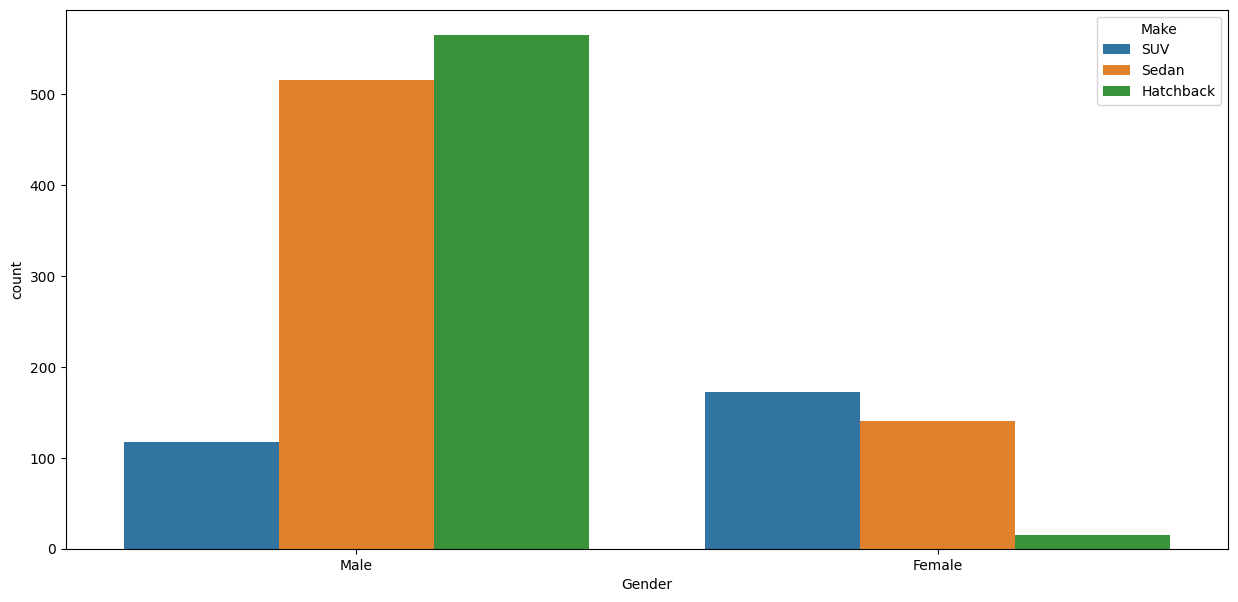

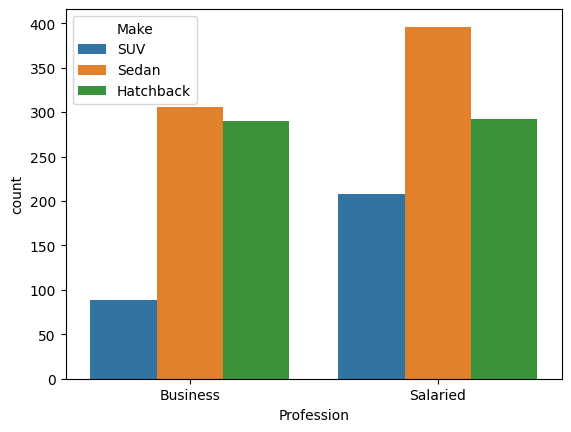

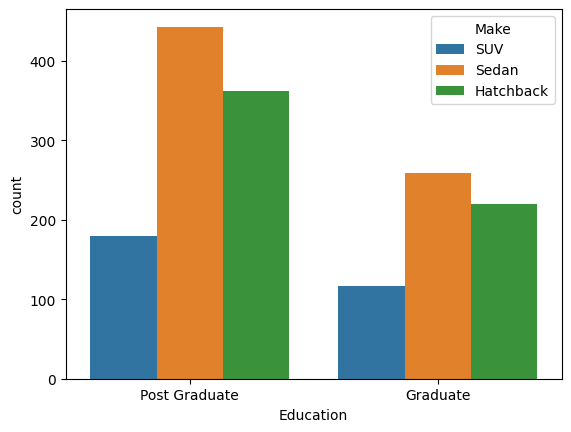

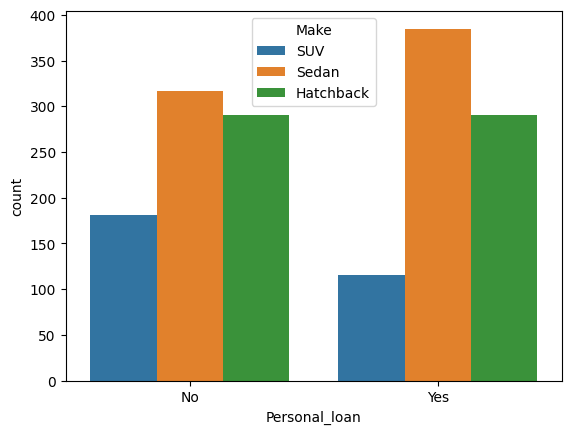

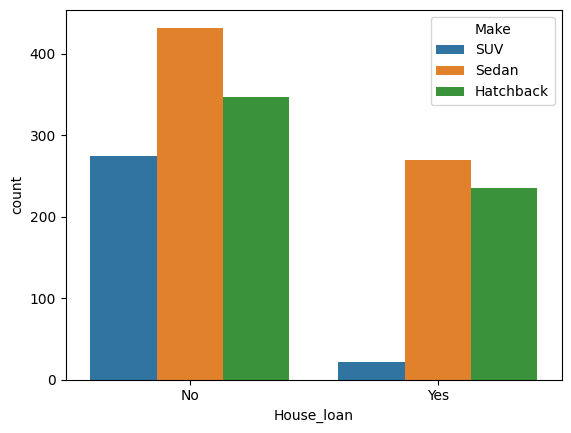

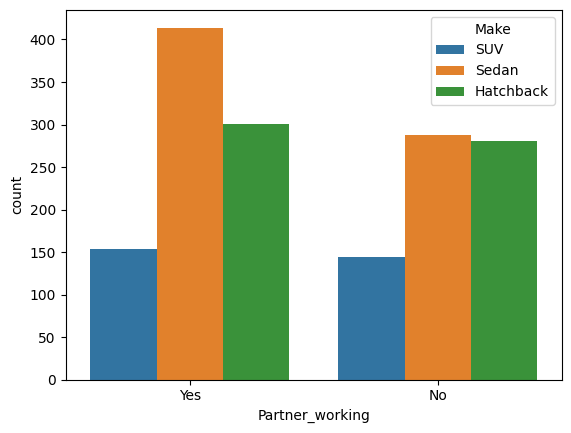

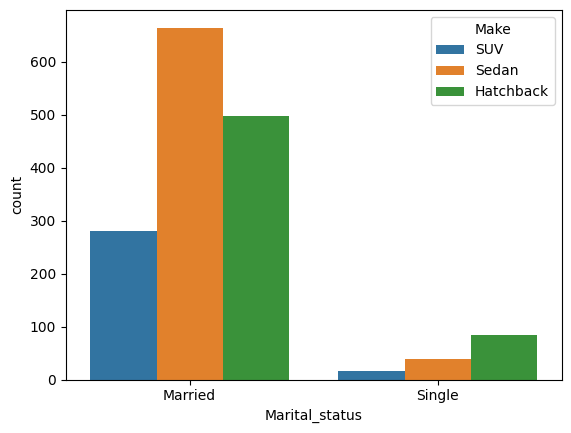

In [140]:
lst_num_var = [ 'Gender','Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Marital_status']
plt.figure(figsize=(15, 7))
plots=( cntplot(n) for n in lst_num_var )
for plot in plots:
    plt.show()

### Bivariate analysis

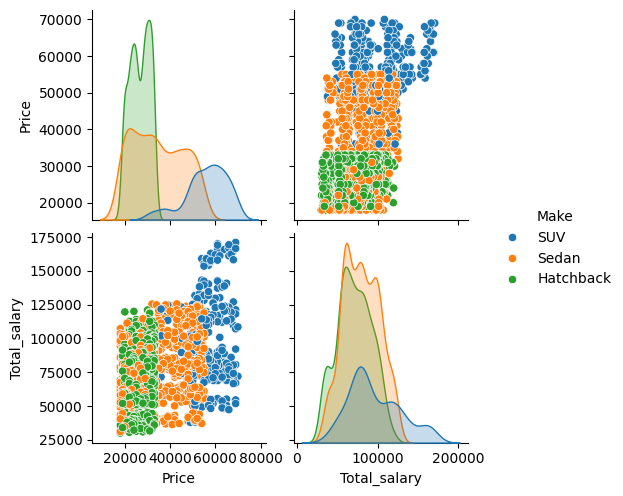

In [141]:
sns.pairplot(data,vars=['Price',  'Total_salary'], hue='Make')

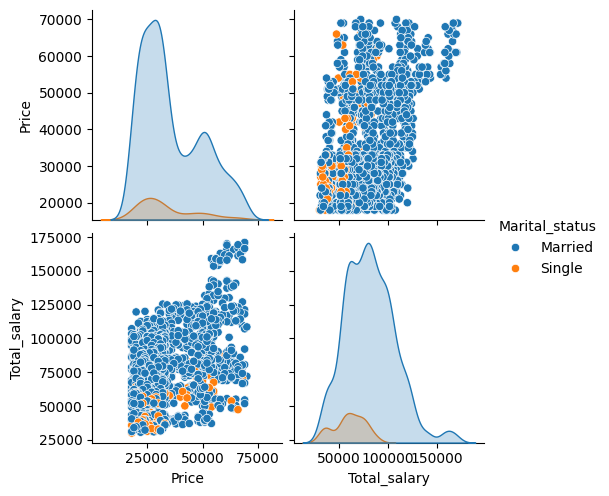

In [142]:
sns.pairplot(data,vars=['Price',  'Total_salary'], hue='Marital_status')

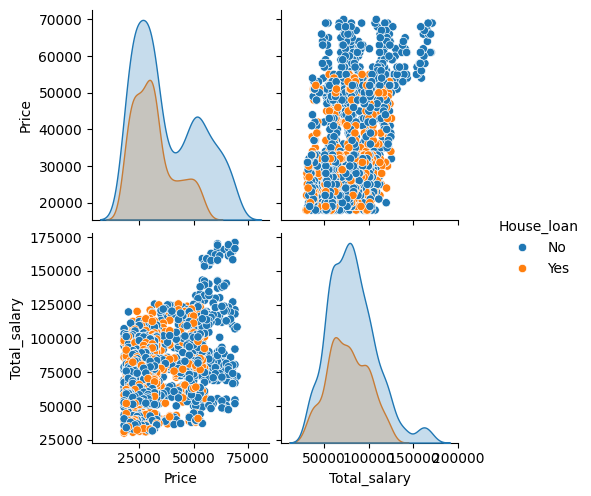

In [143]:
sns.pairplot(data,vars=['Price',  'Total_salary'], hue='House_loan')

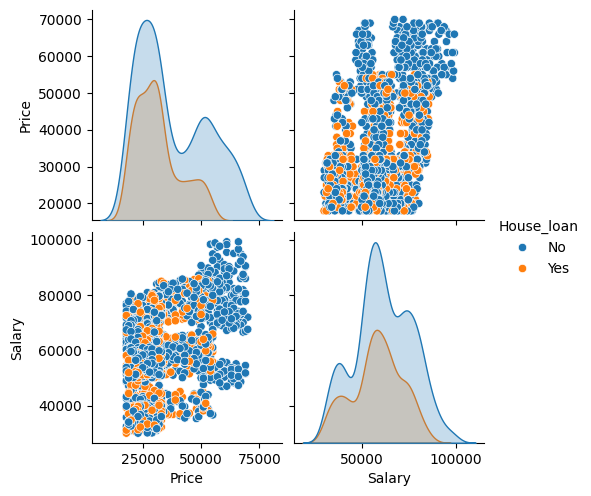

In [144]:
sns.pairplot(data,vars=['Price',  'Salary'], hue='House_loan')

In [145]:
cols=['Price',  'Total_salary']
data[cols].corr()

,Price,Total_salary
Price,1.000,0.368
Total_salary,0.368,1.000


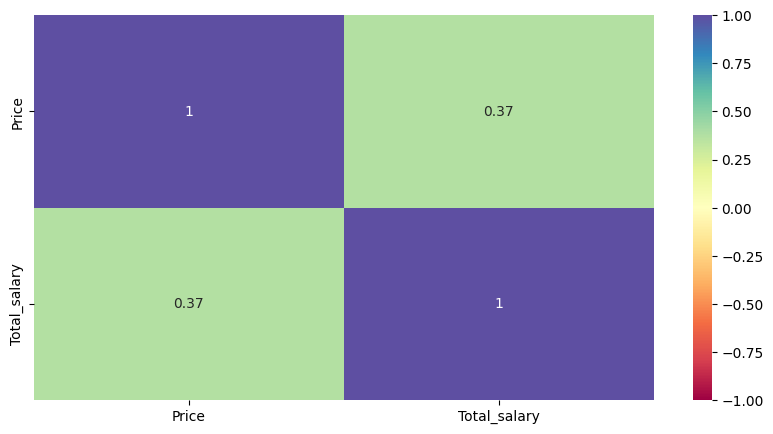

In [146]:
plt.figure(figsize=(10,5))
sns.heatmap(data[cols].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [147]:
cols=['Price',  'Salary']
data[cols].corr()

,Price,Salary
Price,1.000,0.410
Salary,0.410,1.000


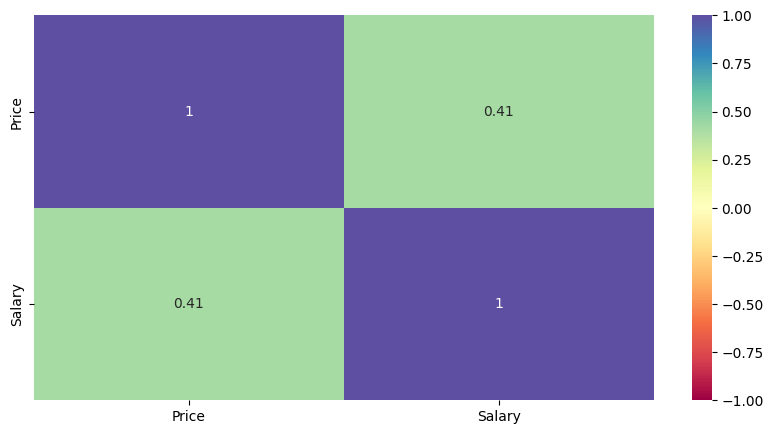

In [148]:
plt.figure(figsize=(10,5))
sns.heatmap(data[cols].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()